In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
metrics_dir = '../metrics'

In [3]:
model_results = {
    "Linear Regression": "linear_regression.json",
    "Neural Network": "neural_network.json",
    "Polynomial Regression": "polynomial_regression.json",
    "XGBoost": "xgboost.json",
    "Stacking": "stacking_regression.json",
}

In [4]:
metrics = []

for model_name, filename in model_results.items():
    filepath = os.path.join(metrics_dir, filename)

    if os.path.exists(filepath):
        with open(filepath, 'r') as f:
            data = json.load(f)
            data['model_name'] = model_name
            metrics.append(data)
            print(f"{model_name} metrics loaded from {filepath}")
    else:
        print(f"Model {model_name} metrics not found, skipping")
if not metrics:
    print("No metrics found")
else:
    metrics_df = pd.DataFrame(metrics)
    metrics_df = metrics_df.set_index('model_name')

Linear Regression metrics loaded from ../metrics/linear_regression.json
Neural Network metrics loaded from ../metrics/neural_network.json
Polynomial Regression metrics loaded from ../metrics/polynomial_regression.json
XGBoost metrics loaded from ../metrics/xgboost.json
Stacking metrics loaded from ../metrics/stacking_regression.json


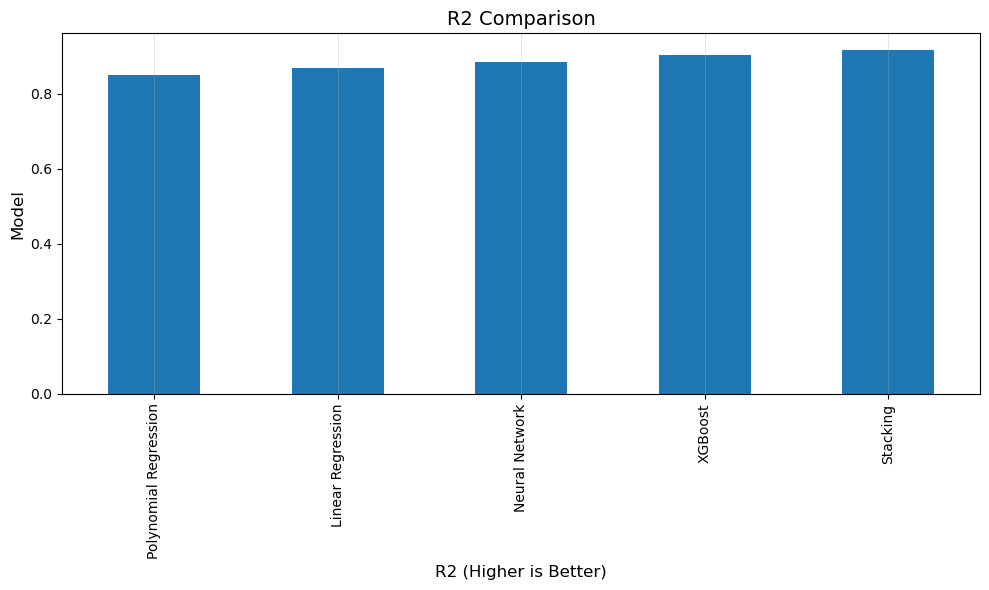

In [5]:
plt.figure(figsize=(10, 6))
metrics_df['r2'].sort_values().plot(kind='bar')
plt.xlabel('R2 (Higher is Better)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('R2 Comparison', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

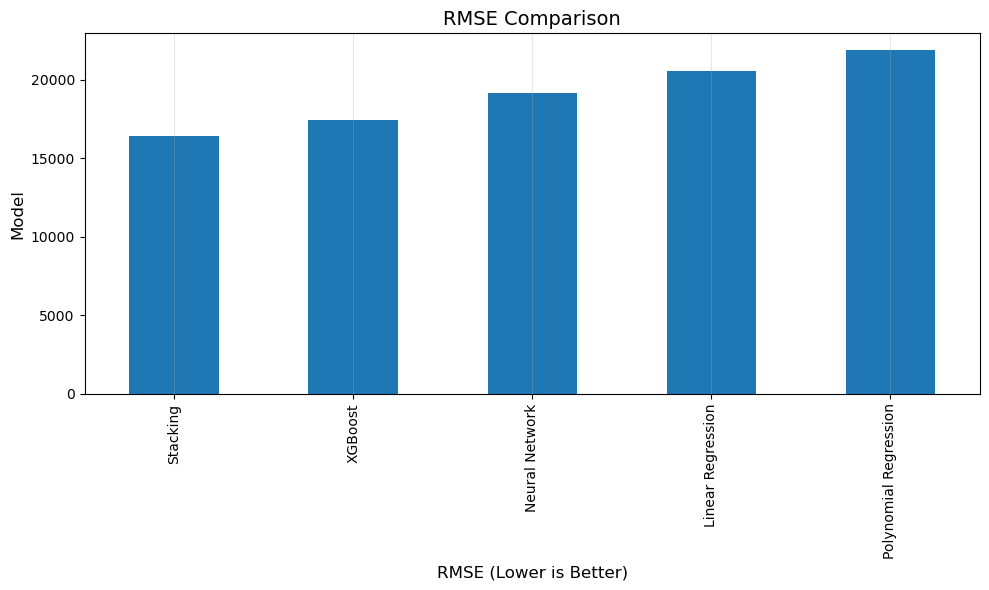

In [6]:
plt.figure(figsize=(10, 6))
metrics_df['rmse'].sort_values().plot(kind='bar')
plt.xlabel('RMSE (Lower is Better)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('RMSE Comparison', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
display_df = metrics_df.copy()
display_df['mse'] = display_df['mse'].apply(lambda x: f"{x:,.0f}")
display_df['rmse'] = display_df['rmse'].apply(lambda x: f"{x:,.2f}")
display_df['mae'] = display_df['mae'].apply(lambda x: f"{x:,.2f}")
display_df['r2'] = display_df['r2'].apply(lambda x: f"{x:.4f}")

print(display_df)

                               mse       rmse        mae      r2
model_name                                                      
Linear Regression      422,423,769  20,552.95  13,708.15  0.8672
Neural Network         366,843,917  19,153.17  13,684.52  0.8847
Polynomial Regression  477,486,045  21,851.45  13,558.80  0.8499
XGBoost                304,088,384  17,438.13  11,919.85  0.9044
Stacking               269,727,397  16,423.38  11,489.71  0.9152
